In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(platetools)))
suppressWarnings(suppressPackageStartupMessages(library(gridExtra)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(viridis)))
suppressWarnings(suppressPackageStartupMessages(library(argparse)))   
source("../../../figures/utils/figure_themes.r") 

In [2]:
cell_type <- "PBMC"

In [3]:

df_stats_path <- file.path(
    paste0("../results/regression/",cell_type,"/combined/model_stats.csv"
    )
)
df_stats_path_all_channels <- file.path(
    paste0("../results/regression/",cell_type,"/model_stats.csv"
    )
)

# import csv file
df <- read.csv(df_stats_path)

df_stats_path_all_channels <- read.csv(df_stats_path_all_channels)

In [4]:
df_stats_path_all_channels$dataset <- "all_channels"
# merge df_stats_path_all_channels with df
df <- rbind(df, df_stats_path_all_channels)

In [5]:
print(unique(df$shuffle))
print(length(unique(df$cytokine)))
print(unique(df$dataset))

[1] "final"             "shuffled_baseline"
[1] 187
[1] "DNA_Gasdermin_ER_PM"   "DNA_ER_Mito_PM"        "DNA_Gasdermin_ER_Mito"
[4] "DNA_Gasdermin_Mito_PM" "Gasdermin_ER_Mito_PM"  "all_channels"         


In [6]:
df$shuffle_plus_data_split <- paste0(df$shuffle, "_", df$data_split)
# replace 'final_test_data' with 'Final + Test' and 'final_train_data' with 'Final + Train' 
df$shuffle_plus_data_split <- gsub("final_test_data", "Final + Test", df$shuffle_plus_data_split)
df$shuffle_plus_data_split <- gsub("final_train_data", "Final + Train", df$shuffle_plus_data_split)
df$shuffle_plus_data_split <- gsub("shuffled_baseline_test_data", "Shuffled + Test", df$shuffle_plus_data_split)
df$shuffle_plus_data_split <- gsub("shuffled_baseline_train_data", "Shuffled + Train", df$shuffle_plus_data_split)

unique(df$dataset)
df$dataset <- gsub("all_channels", "All channels", df$dataset)
df$dataset <- gsub("DNA_ER_Mito_PM", "- Gasdermin", df$dataset)
df$dataset <- gsub("DNA_Gasdermin_ER_PM", "- Mito", df$dataset)
df$dataset <- gsub("DNA_Gasdermin_ER_Mito", "- PM", df$dataset)
df$dataset <- gsub("DNA_Gasdermin_Mito_PM", "- ER", df$dataset)
df$dataset <- gsub("Gasdermin_ER_Mito_PM", "- DNA", df$dataset)
# facorize the dataset
df$dataset <- factor(df$dataset, levels=c("All channels", "- Gasdermin", "- Mito", "- PM", "- ER", "- DNA"))


[1] "DNA_Gasdermin_ER_PM"   "DNA_ER_Mito_PM"        "DNA_Gasdermin_ER_Mito"
[4] "DNA_Gasdermin_Mito_PM" "Gasdermin_ER_Mito_PM"  "all_channels"

In [7]:
# factorize the shuffle_plus_data_split column
df$shuffle_plus_data_split <- factor(df$shuffle_plus_data_split, levels=c("Shuffled + Test", "Shuffled + Train", "Final + Test", "Final + Train"))

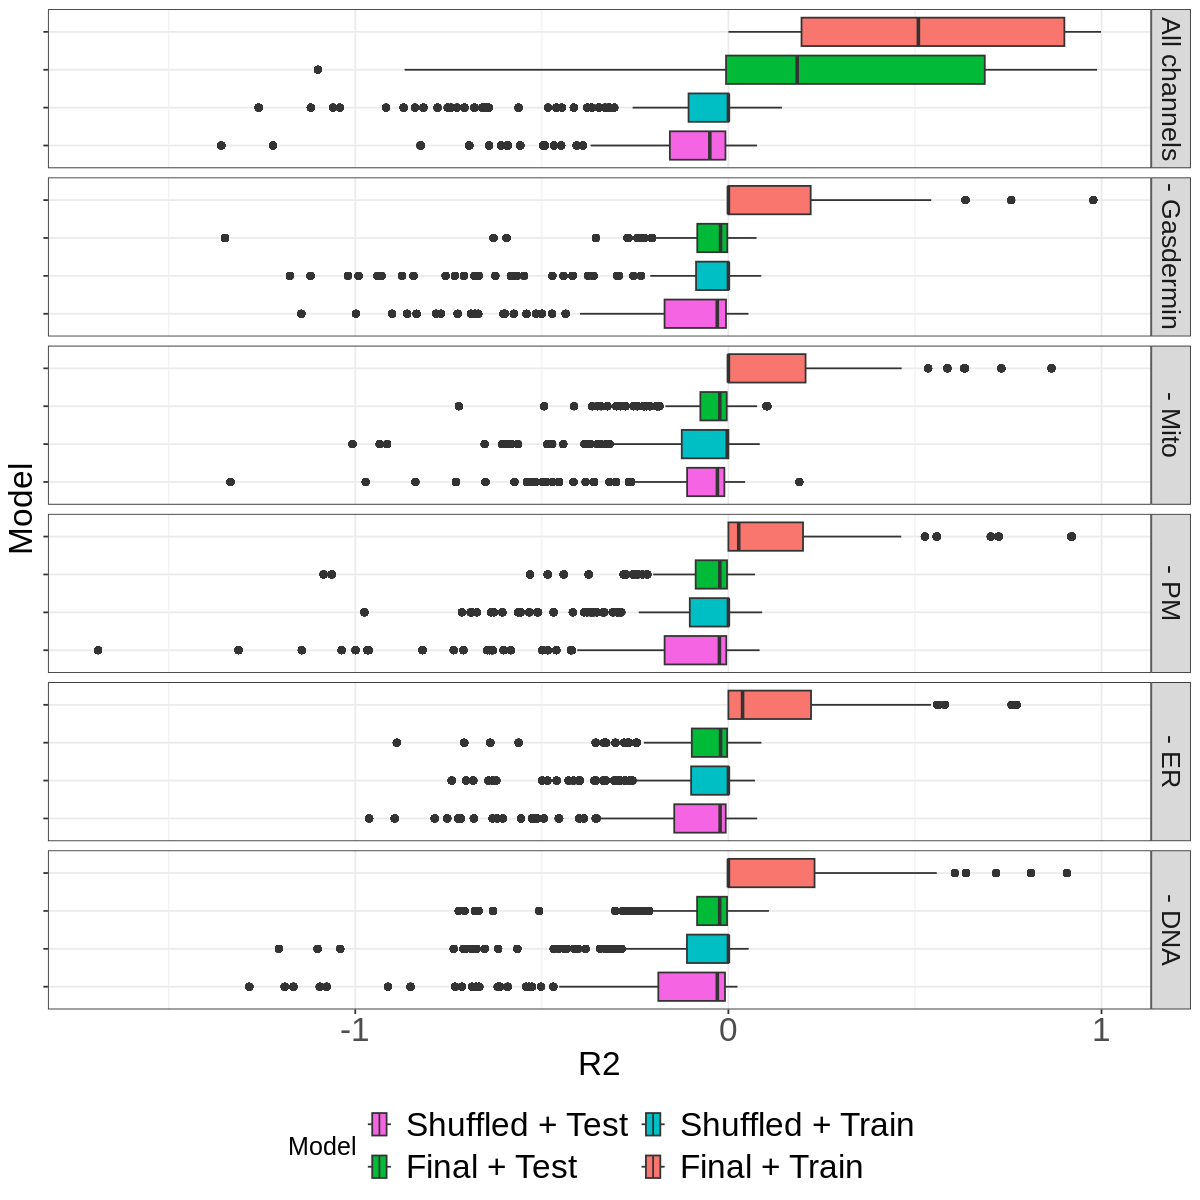

In [8]:
# get the default R color palette
default_colors <- c("#F8766D", "#00BA38", "#00BFC4", "#F564E3")

height <- 10
width <- 10
options(repr.plot.width=width, repr.plot.height=height)
# box plot for LOCO
p <- (

ggplot(df, aes(x=r2, y=shuffle_plus_data_split, fill=shuffle_plus_data_split))
    + geom_boxplot()
    + figure_theme
    + ylab("Model")
    + xlab("R2")
    # change legend labels
    + labs(fill = "Model", hjust=0.5)
    # change legend title size
    # remove legend
    + theme(legend.position="bottom")
    + guides(fill=guide_legend(nrow=2, byrow=TRUE))
    # remove y tick labels
    + theme(axis.text.y=element_blank())

    # change color of the boxplot
    + scale_fill_manual(values=c(
        default_colors[4],
        default_colors[3],
        default_colors[2],
        default_colors[1]
    ))
    + facet_grid(dataset~.)

)
p
# set output path
global_prediction_trend_path <- file.path(paste0('../figures/regression/PBMC/aggregated_with_nomic',"global_prediction_trend_LOCO.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# save the plot
ggsave(global_prediction_trend_path, p, width=width, height=height, dpi=600)